# Beating the House: Underdogs vs Betting Odds (2005/06)

This notebook contains the **data preparation, analysis, and aggregation steps**
that support the interactive storytelling blog.

**Goal:**  
To test whether betting odds reliably predict match outcomes and identify
systematic patterns where underdogs outperform expectations.

The final insights are presented in the HTML blog.


In [ ]:
import pandas as pd
pd.__version__

# This removes the limit on how many columns are shown
pd.set_option('display.max_columns', None)

# Optional: This makes sure the columns are wide enough to read the full names
pd.set_option('display.width', 1000)

## 1. Data Loading

This section loads the raw match-level Premier League data used for analysis.


In [ ]:
df = pd.read_csv('/Users/smathur/Downloads/Mini Project 1/data/example.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

## 2. Data Cleaning & Preparation

The dataset is cleaned to ensure:
- Consistent team naming
- Correct match outcomes
- Valid odds and result fields

Only transformations required for analysis are applied.


In [ ]:
df.isnull().sum()

In [ ]:
df.columns.tolist()

In [ ]:
df.columns 

In [ ]:
df['HomeTeam'].value_counts()

In [ ]:
df.dtypes

In [ ]:
# Checking the data types of each column 
df.dtypes

In [ ]:
# Data type of date column is object which is not in usable form so converting it to datetime format that is in the usable form 
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
df.dtypes

## 3. Feature Engineering

Key analytical features are created, including:
- Favorite vs underdog classification (based on betting odds)
- Match outcome labels
- Points earned per match

These features form the basis for all subsequent analysis.


In [ ]:
# Perfoming the encoding task that is 
# Converting Category data into Quantity 
# In football match there are three outcomes
# Winning that winning a game 3 points
# Drawing that drawing a game 1 point
# Losing that losing a game 0 points

def get_home_points(result):
    if result == 'H':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
def get_away_points(result):
    if result == 'A':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

In [ ]:
df.columns

In [ ]:
df['Full time result']

In [ ]:
df['HomePoints']=df['Full time result'].apply(get_home_points)
df['AwayPoints']=df['Full time result'].apply(get_away_points)

In [ ]:
df.tail(10)

In [ ]:
columns_to_keep = [
    'Date', 'HomeTeam', 'AwayTeam', 
    'Full time home goals', 'Full time away goals', 'Full time result', 'Half time result',
    'Referee', 'Home shots', 'Away shots', 'Home shots on target', 'Away shots on target',
    'Home fouls', 'Away fouls', 'Home corners', 'Away corners',
    'Home yellows', 'Away yellows', 'Home reds', 'Away reds',
    'Bet365 home odds', 'Bet365 draw odds', 'Bet365 away odds'
]

In [ ]:
df_clean=df[columns_to_keep].copy()
df_clean.head()

In [ ]:
df_clean.columns

In [ ]:
df_clean.head()

In [ ]:
df_clean['HomePoints']=df_clean['Full time result'].apply(get_home_points)
df_clean['AwayPoints']=df_clean['Full time result'].apply(get_away_points)

In [ ]:
df_clean.head()

In [ ]:
df.shape
df_clean.shape

In [ ]:
#Identitfing the favorite team based on the betting odds provided by Bet365
def get_favorite(row):
    h,d,a= row['Bet365 home odds'], row['Bet365 draw odds'], row['Bet365 away odds']
    if h<a and h<d:
        return 'Home'
    elif a<h and a<d :
        return 'Away'
    else:
        return 'Draw'#if odds are exactly equal 
df_clean['Favorites']= df_clean.apply(get_favorite, axis=1)

    

In [ ]:
df_clean.head()

In [ ]:
#Checking that if the favorite team won the match

def check_upset(row):
    if row['Favorites']=='Home' and row['Full time result']!= 'H':
        return True
    if row['Favorites']=='Away' and row['Full time result']!='A':
        return True
    
df_clean['IsUpset']= df_clean.apply(check_upset,axis=1)


In [ ]:
df_clean.head()

## 4. Aggregation & Metrics

Match-level data is aggregated to compute:
- Favorite failure rates
- Underdog points accumulation
- Team-level underdog performance

All metrics are calculated at the season level.


In [ ]:
team_stats = []
teams = df_clean['HomeTeam'].unique()

for team in teams:
    # 1. Total Points (already created by you)
    h_points = df_clean[df_clean['HomeTeam']==team]['HomePoints'].sum() 
    a_points = df_clean[df_clean['AwayTeam']==team]['AwayPoints'].sum()
    total_pts= h_points+ a_points

    # 2. Points earned specifically when they were NOT the favorite
    underdog_home = df_clean[(df_clean['HomeTeam']==team) & (df_clean['Favorites'] != 'Home')]
    underdog_away = df_clean[(df_clean['AwayTeam']==team) & (df_clean['Favorites'] != 'Away')]

    underdog_pts = underdog_home['HomePoints'].sum() + underdog_away['AwayPoints'].sum()

    team_stats.append({'Team': team, 'TotalPoints': total_pts, 'UnderdogPoints': underdog_pts})

overachiever_df = pd.DataFrame(team_stats).sort_values(by='UnderdogPoints', ascending=False)

In [ ]:
df_clean.head()

In [ ]:
print(overachiever_df)

In [ ]:
# Save the summary  table of the team individual performance 
overachiever_df.to_csv('Team_Overachiever_Summary.csv', index=False)
# view top 5 Overachiever 
print("--THE TOP 5 GIANT SLAYER--")
print(overachiever_df.head(5))

In [ ]:
overachiever_df.count()

## 5. Exporting Cleaned Data

Final datasets are exported as CSV files for use in
the interactive HTML visualization and storytelling blog.


In [ ]:
df_clean.to_csv('Clean_Data.csv',index=False)

In [ ]:
df_clean.head()

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
# Setting up a professional style 
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize']=(10,6)


### 6.1 Favorite Failure Rate


/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/110445935.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  upset_counts = df_clean['IsUpset'].fillna(False).value_counts()


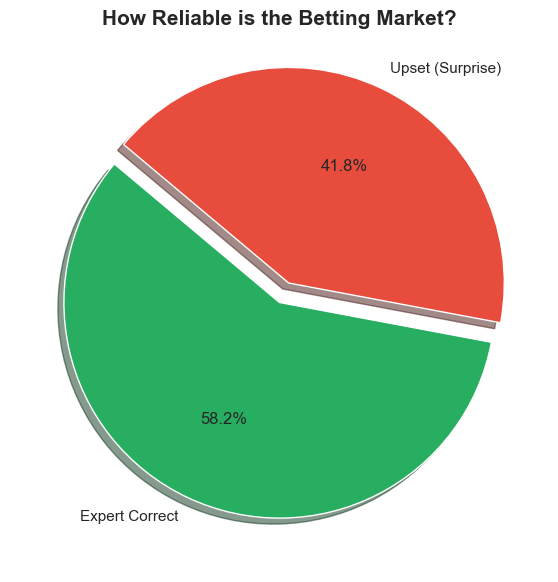

In [148]:
#1 PIE CHART: Market Reliability 
upset_counts = df_clean['IsUpset'].fillna(False).value_counts()
plt.figure(figsize=(7,7))
plt.pie(upset_counts, labels=['Expert Correct', 'Upset (Surprise)'], autopct='%1.1f%%', 
        colors=['#27ae60', '#e74c3c'], startangle=140, explode=(0, 0.1), shadow=True)
plt.title('How Reliable is the Betting Market?', fontsize=15, fontweight='bold')
plt.show()

### 6.2 Underdog Points by Team


/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/169300323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='UnderdogPoints', y='Team', palette='Reds_r')


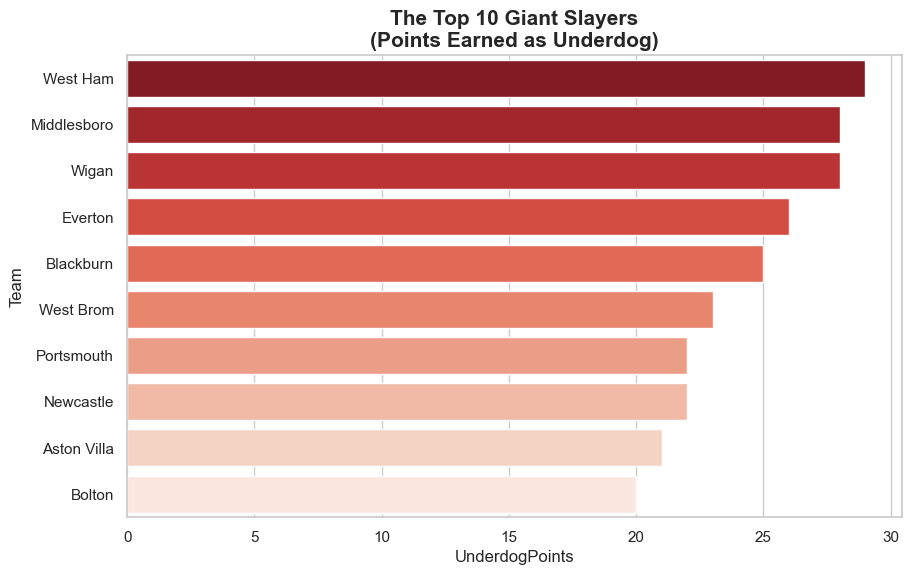

In [149]:
# 2. BAR CHART: Top 10 Giant Slayers
top_10 = overachiever_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='UnderdogPoints', y='Team', palette='Reds_r')
plt.title('The Top 10 Giant Slayers\n(Points Earned as Underdog)', fontsize=15, fontweight='bold')
plt.show()


### 6.3 ELITE VS GIANT SLAYERS 


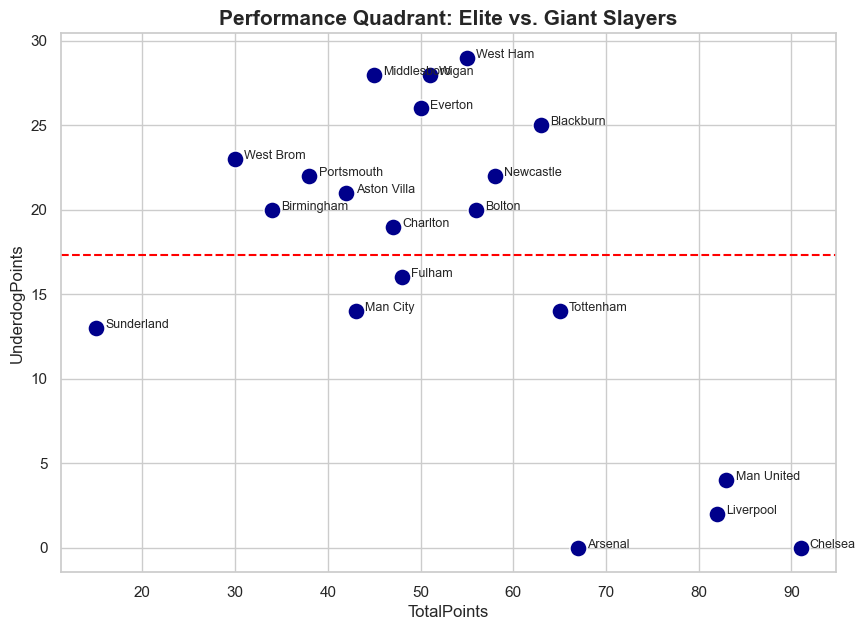

In [150]:
# 3. SCATTER PLOT: Skill vs. Surprise

plt.figure(figsize=(10, 7))
sns.scatterplot(data=overachiever_df, x='TotalPoints', y='UnderdogPoints', s=150, color='darkblue')
for i in range(overachiever_df.shape[0]):
    plt.text(overachiever_df.TotalPoints[i]+1, overachiever_df.UnderdogPoints[i], overachiever_df.Team[i], fontsize=9)
plt.axhline(overachiever_df['UnderdogPoints'].mean(), color='red', linestyle='--')
plt.title('Performance Quadrant: Elite vs. Giant Slayers', fontsize=15, fontweight='bold')
plt.show()

### 6.4Most Unpredictable Team 



/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/3483639710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_unpredictable, x='SurpriseRatio', y='Team', palette='viridis')


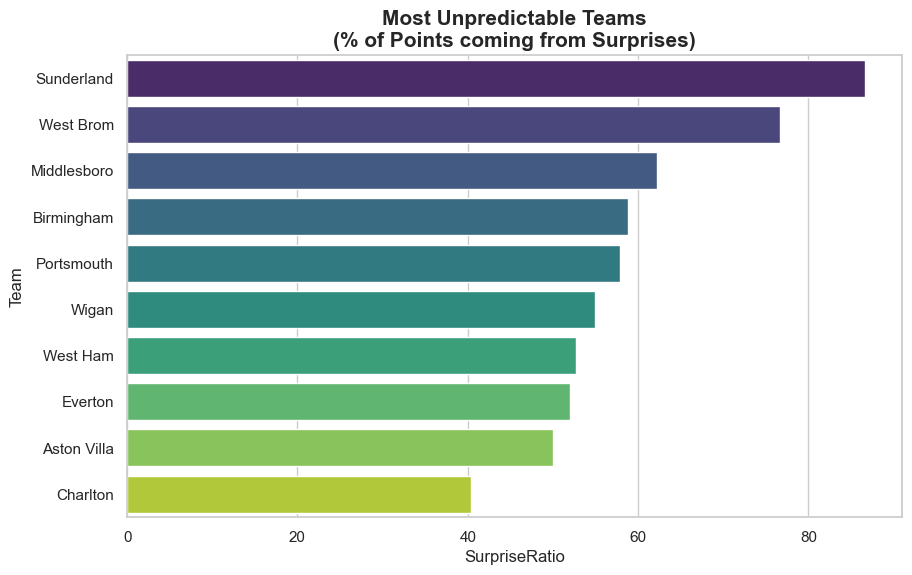

In [151]:
# 4. BAR CHART: The Unpredictables (Surprise Ratio)

overachiever_df['SurpriseRatio'] = (overachiever_df['UnderdogPoints'] / overachiever_df['TotalPoints'] * 100)
top_unpredictable = overachiever_df.sort_values('SurpriseRatio', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_unpredictable, x='SurpriseRatio', y='Team', palette='viridis')
plt.title('Most Unpredictable Teams\n(% of Points coming from Surprises)', fontsize=15, fontweight='bold')
plt.show()

### 6.5  Home vs Away Performance


/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/363615938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home Underdogs', 'Away Underdogs'], y=[home_u_pts, away_u_pts], palette='Blues_d')


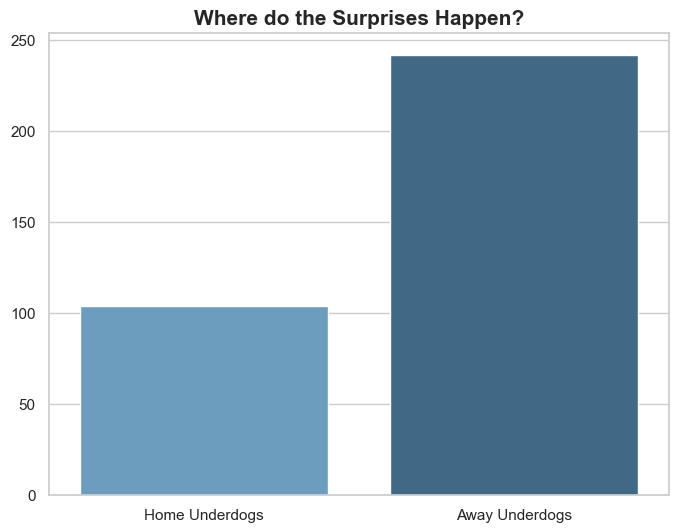

In [152]:
# 5. VENUE BATTLE: Where do Underdogs Strike?
home_u_pts = df_clean[(df_clean['Favorites'] != 'Home')]['HomePoints'].sum()
away_u_pts = df_clean[(df_clean['Favorites'] != 'Away')]['AwayPoints'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Underdogs', 'Away Underdogs'], y=[home_u_pts, away_u_pts], palette='Blues_d')
plt.title('Where do the Surprises Happen?', fontsize=15, fontweight='bold')
plt.show()

### 6.6 Referee In Upsets

/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/2418992470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ref_upsets.values, y=ref_upsets.index, palette='magma')


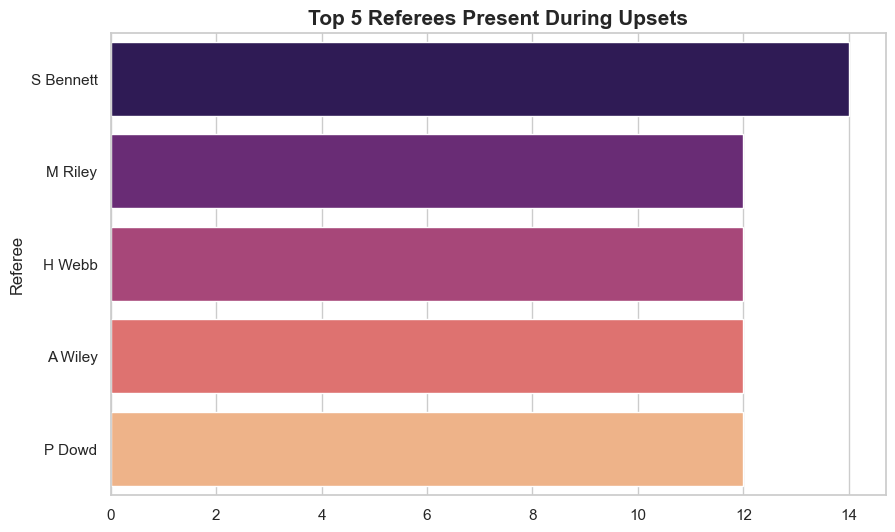

In [153]:
# 6. REFEREE WATCH: Upsets per Referee
ref_upsets = df_clean[df_clean['IsUpset'] == True]['Referee'].value_counts().head(5)
sns.barplot(x=ref_upsets.values, y=ref_upsets.index, palette='magma')
plt.title('Top 5 Referees Present During Upsets', fontsize=15, fontweight='bold')
plt.show()

### 6.7 Underdog Win vs Draw 

/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/968579760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upset_res['Type'] = upset_res.apply(type_up, axis=1)
/var/folders/l7/yjt1b3ys337897lzn42ng8xw0000gn/T/ipykernel_73844/968579760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=upset_res, x='Type', palette='Set2')


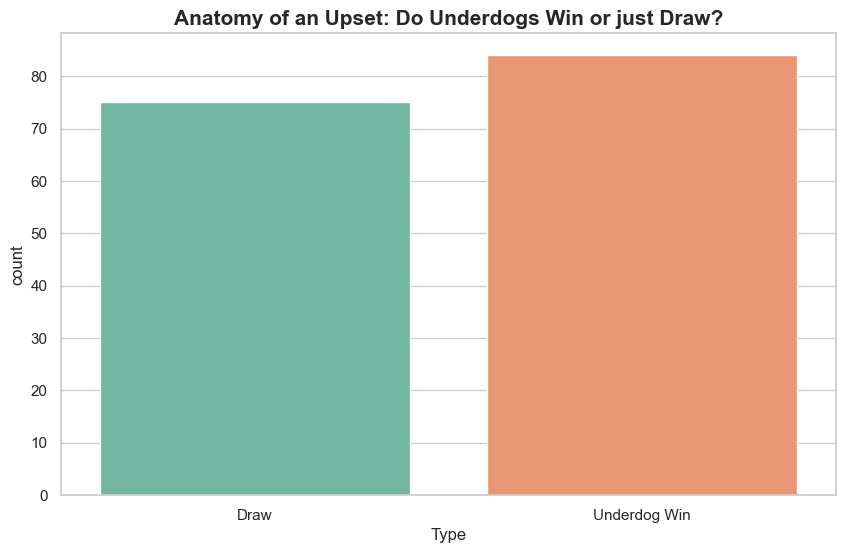

In [154]:
# 7. ANATOMY OF AN UPSET: Win vs. Draw
upset_res = df_clean[df_clean['IsUpset'] == True]
def type_up(row): return 'Draw' if row['Full time result'] == 'D' else 'Underdog Win'
upset_res['Type'] = upset_res.apply(type_up, axis=1)
sns.countplot(data=upset_res, x='Type', palette='Set2')
plt.title('Anatomy of an Upset: Do Underdogs Win or just Draw?', fontsize=15, fontweight='bold')
plt.show()


### 6.8 Distribution of Points (Expected and Underdogs)

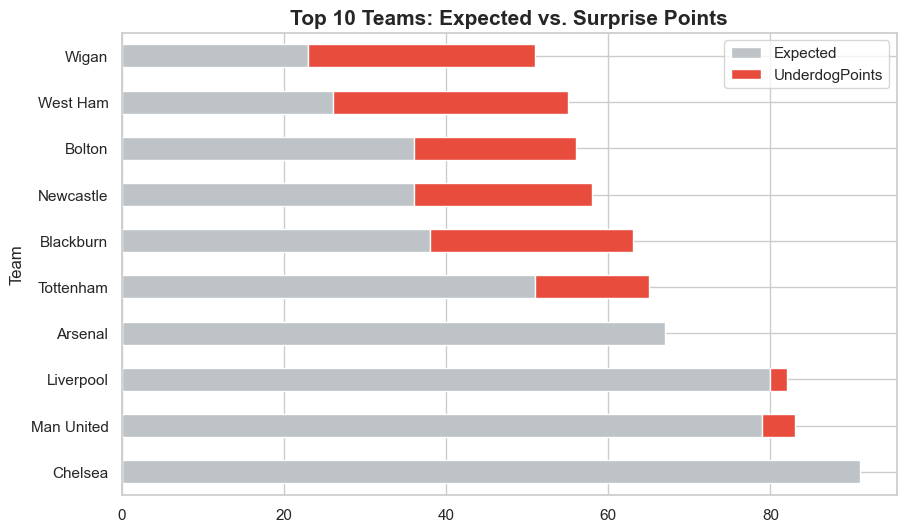

In [155]:
# 8. STACKED BAR: Expected vs. Surprise Points
top_10_all = overachiever_df.sort_values('TotalPoints', ascending=False).head(10)
top_10_all['Expected'] = top_10_all['TotalPoints'] - top_10_all['UnderdogPoints']
top_10_all[['Team', 'Expected', 'UnderdogPoints']].set_index('Team').plot(kind='barh', stacked=True, color=['#bdc3c7', '#e74c3c'])
plt.title('Top 10 Teams: Expected vs. Surprise Points', fontsize=15, fontweight='bold')
plt.show()

### 6.9 Conditions Preferred 

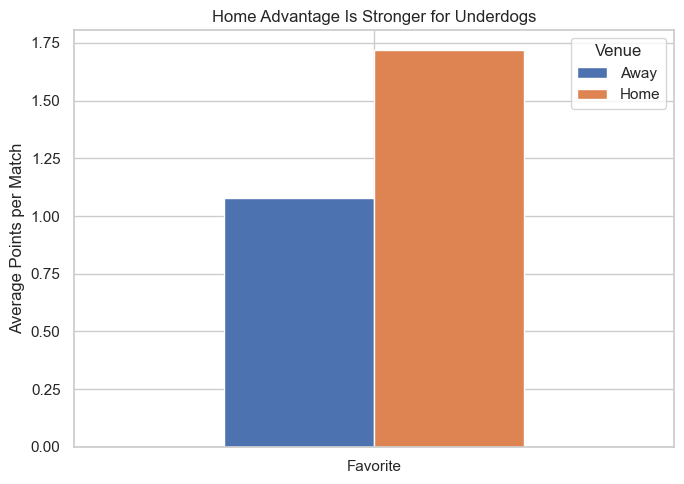

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data


# Create long-format dataset
home = df_clean[['HomeTeam', 'HomePoints', 'Favorites']].copy()
home.columns = ['Team', 'Points', 'IsFavorite']
home['Venue'] = 'Home'

away = df_clean[['AwayTeam', 'AwayPoints', 'Favorites']].copy()
away.columns = ['Team', 'Points', 'IsFavorite']
away['Venue'] = 'Away'

long_df = pd.concat([home, away], ignore_index=True)

# Define team type
long_df['Team Type'] = long_df['IsFavorite'].apply(
    lambda x: 'Favorite' if x else 'Underdog'
)

# Aggregate
venue_perf = (
    long_df
    .groupby(['Team Type', 'Venue'])['Points']
    .mean()
    .unstack()
)

# Plot
venue_perf.plot(
    kind='bar',
    figsize=(7,5)
)

plt.title("Home Advantage Is Stronger for Underdogs")
plt.ylabel("Average Points per Match")
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(title="Venue")
plt.tight_layout()
plt.show()


## Notebook Summary

This notebook focuses on **data processing and analysis only**.
All interpretation, storytelling, and visualization design decisions
are presented in the accompanying HTML blog.

The analysis is fully reproducible using the steps above.
